# Test Settings (to be deleted)

* Import Modules


In [3]:
import os
import numpy as np
import pandas as pd
# import matplotlib as plt
# from random import sample, seed

%matplotlib inline

* Define Directory path

In [4]:
# Work Directories
# git_dir = r'\\imapc\benutzer\Mitarbeiterdaten\henss\_02_software\_08_github'
# work_dir = r'C:\Users\henss'

# Mac Directories
git_dir = r'/Users/markhenss/Documents/GitHub'
work_dir = r'/Applications/anaconda3'


* Load GitHub Modules

In [5]:
os.chdir(git_dir)
import whypy
os.chdir(work_dir)

# <a name="whypy"></a>WhyPy

A python repository for **causal inference**. 

Currently available approaches in this repository are based on **Additive Noise Models (ANMs)**.

<u>Content:</u>
1. [A short introduction into the theory of causal inference](#theory)
2. [A quick start example how to run causal inference with this repository](#quick)
3. [Additive Noise Models in WhyPy](#model)
    1. [Bivariate vs. Multivariate](#model)
    2. [Stationary vs. Transient](#model)
    3. [Instance Parameters](#model-parameters)
    4. [Instance Methods](#model-methods)
    5. [Instance Attributes](#model-attributes)
4. [Various Templates for:](#templates)
    1. [Observations](#templates-observations)
    2. [Regression Models](#templates-regressionmodels)
    3. [Scaler](#templates-scaler)

# <a name="theory"></a>Causal Inference (Short Introduction)

The most elementary question of causality is the one asking whether "$X$ causes $Y$ or vice versa". An often discussed example is the question if smoking ($X$) causes cancer ($Y$). At this point the question about causal relationships is already getting more complex. Beside the possibility that $X$ causes $Y$ ($X \rightarrow Y$), there are other possible causal relationships. One is that a third Variable $Z$ is confounding both $X$ and $Y$ ($X \leftarrow Z \rightarrow Y$). In the confounding case, only looking at $X$ and $Y$, they might show a correlation due to the confounder even though they are not causaly related. For further details please refer to Pearl [[1]](#Pearl).

![Cause-Effect-Confounded](__pictures/cause-effect-confounded.pdf)

Causal Inference is the task of learning causal relationships from purely observational data. This task is a fundamental problem in science. A variety of causal inference methods are available that were claimed to be able to solve this task under certain assumptions. These assumptions are for example no confounding, no feedback loops or no selection bias. Results given by causal inference are only valid under the methods assumptions. In general these methods are exploiting the complexety of the distributions of the observational data. Given a cause $C$ and an effect $E$ the factorization of the joint density $p_{C,E}(c, e)$ is more complex in one direction than the alternative direction. Intuivtively: [[1]](#Mooji), [[3]](#Schoelkopf)
* $p_{C}(c) \cdot p_{E | C}(e | c) \rightarrow$ lower total complexity
* $p_{E}(e) \cdot p_{C | E}(c | e) \rightarrow$ higher total complexity

The family of causal inference methods to be used here are Additive Noise Models (ANMs). In ANMs the is the influence of noise restricted to be Additive ($Y \sim f(X) + \textbf{N}_Y$). Methods in these class are either based on **independence of residuals** or **maximum likelihood**. The procedure in the ANM method family and in the introduced **WhyPy Toolbox** is the following:

---
1. **Input:**

   Observations: $X$, $Y$
   
   Regression Model: $M$
   
   Scaler (optional): $n()$

2. **Normalization (if scale is True):**

   Calculate $X^{\star} = n_x(X)$
   
   Calculate $Y^{\star} = n_y(Y)$

3. **Time Shift (if model is transient):**

   a) Shift $X^{\star} = X^{\star}[0:s:i], Y^{\star} = Y^{\star}[i:s:-1]$
   
   b) Shift $Y^{\star} = Y^{\star}[0:s:i], X^{\star} = X^{\star}[i:s:-1]$
   
4. **Holdout (if holdout is True):**

   Split $X^{\star} \rightarrow X^{\star}_{regress}, X^{\star}_{test}$
   
   Split $Y^{\star} \rightarrow Y^{\star}_{regress}, Y^{\star}_{test}$

5. **Fit Regression Model:**

   a) Fit $M_{X^{\star}_{regress} \rightarrow Y^{\star}_{regress}}$
   
   b) Fit $M_{Y^{\star}_{regress} \rightarrow X^{\star}_{regress}}$

6. **Predict based on Regression Model:**

   a) Regress $\hat{Y^{\star}}_{test} = M_{X^{\star}_{regress} \rightarrow Y^{\star}_{regress}}(X^{\star}_{test})$
   
   b) Regress $\hat{X^{\star}}_{test} = M_{Y^{\star}_{regress} \rightarrow X^{\star}_{regress}}(Y^{\star}_{test})$

6. **Get Residuals:**

   a) Calculate $\epsilon_{X^{\star}_{test} \rightarrow Y^{\star}_{test}} = \hat{Y^{\star}}_{test} - Y^{\star}_{test}$
   
   b) Calculate $\epsilon_{Y^{\star}_{test} \rightarrow X^{\star}_{test}} = \hat{X^{\star}}_{test} - X^{\star}_{test}$


6. **Evaluation Test:**

   a) Test $\epsilon_{X^{\star}_{test} \rightarrow Y^{\star}_{test}}$ vs. $X^{\star}$
   
   b) Test $\epsilon_{Y^{\star}_{test} \rightarrow X^{\star}_{test}}$ vs. $Y^{\star}$

6. **Interpretation:**

   a) Please refer to the given literature
   
   b) Please refer to the given literature
   
---  
   
Further reading:

<table>
<tr>
<td align="left"><b><a name="Pearl"></a>[1]</b></td>
<td>Pearl, J. (2009). Causality. Second Edition</td>
</tr>
<tr>
<td align="left"><b><a name="Mooji"></a>[2]</b></td>
<td>Mooij, J. M., Peters, J., Janzing, D., Zscheischler, J., & Schölkopf, B. (2016). Distinguishing Cause from Effect Using Observational Data: Methods and Benchmarks. Journal of Machine Learning Research</td>
</tr>
<tr>
<td align="left"><b><a name="Schoelkopf"></a>[3]</b></td>
<td>Peters, J., Janzing, D., & Schoelkopf, B. (2017). Elements of Causal Inference - Foundations and Learning Algorithms. MIT press.</td>
</tr>
</table>


[[return to start]](#whypy)

# <a name="quick"></a>Quick Start

Load predefined templates of observations, regression model and scaler:

Modelclass:,2
No. of Variables:,2
Class of Functions:,Non-Linear
Class of Noise Distribution:,"Gaussian, Additive, Non-Equivalent"
SCM,"X0 ~ [ N (5, 0.25) ] X1 ~ [ X03 + N (0, 2.25) ]"


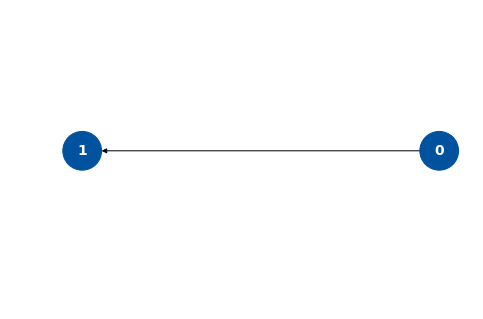

scale:,None
max_iter:,100
tol:,0.0001
callbacks:,"['deviance', 'diffs']"
verbose:,False
terms:,s(0)
fit_intercept:,True


copy:,True
with_mean:,True
with_std:,True


In [8]:
obs = whypy.load.observations(modelclass=2, no_obs=500, seed=1)
regmod = whypy.load.model_lingam(term='spline')
scaler = whypy.load.scaler_standard()

Modelclass:,5
No. of Variables:,3
Class of Functions:,Non-Linear
Class of Noise Distribution:,"Gaussian, Additive, Non-Equivalent"
SCM,"X0 ~ [ N (1, 0.25) ] X1 ~ [ N (0, 2.25) ] X2 ~ [ X04 + X12 + N (0, 0.25) ]"


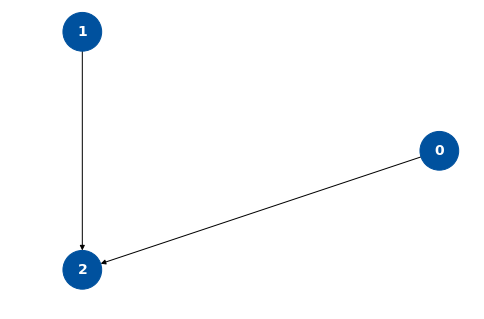

In [9]:
# os.chdir(r'\\imapc\benutzer\Mitarbeiterdaten\henss\_02_software')
# data = pd.read_csv('Test2_Bearing1.csv', sep=',' , header=0, index_col=None)
# obs = np.array(data)

In [10]:
# regmod = whypy.load.model_svr('rbf')
regmod = whypy.load.model_polynomial_lr(2)


copy:,True
with_mean:,True
with_std:,True


In [11]:
mymodel1 = whypy.steadystate.mvariate.Model(obs=obs, combinations='all', regmod=regmod, scaler=scaler)
mymodel2 = whypy.steadystate.bivariate.Model(obs=obs, combinations='all', regmod=regmod, scaler=scaler, obs_name=columns)

[[return to start]](#whypy)

## Run

In [12]:
mymodel1.run(testtype='LikelihoodVariance', #LikelihoodVariance LikelihoodEntropy KolmogorovSmirnoff MannWhitney HSIC
            scale=True,
            bootstrap=False,
            holdout=False,
            plot_inference=False,
            plot_results=False,
#             bootstrap_ratio=1,
#             bootstrap_seed=5,
#             holdout_ratio=0.2,
#             holdout_seed=1,
#             modelpts=50,
#             gridsearch = True,
#             param_grid = {'C': [0.001, 0.01, 1, 10],
#                           'gamma': [0, 0.00001, 0.001, 0.1, 1],
#                           'coef0': [0],
#                           'tol': [0.001],
#                           'epsilon': [0.1]},
            )

In [13]:
# mymodel.plot_inference()

testtype:,LikelihoodVariance
scale:,True
bootstrap:,30
holdout:,True
shape_observations:,"(500, 3)"
shape_combinations:,"(6, 2)"
regression_model:,"Pipeline(memory=None, steps=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True, func=.polyfeatures at 0x11103bc80>, inv_kw_args=None, inverse_func=None, kw_args=None, pass_y='deprecated', validate=True)), ('ridgecv', RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=None, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])"
scaler_model:,"StandardScaler(copy=True, with_mean=True, with_std=True)"
**kwargs:,"{'bootstrap_ratio': 1, 'bootstrap_seed': 1, 'holdout_ratio': 0.2, 'holdout_seed': 1, 'modelpts': 50, 'gridsearch': False}"


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$age \sim f(gender)$,9.631e-14,9.862e-07,6.025e-01,2.737e-01,7.120e-07,3.483e-02
1,$gender \sim f(age)$,6.025e-01,2.737e-01,9.631e-14,9.862e-07,4.762e-01,3.578e-01
2,$age \sim f(sex)$,1.418e-27,9.714e-21,6.025e-01,2.737e-01,1.457e-05,5.124e-03
3,$sex \sim f(age)$,6.025e-01,2.737e-01,1.418e-27,9.714e-21,2.142e-13,1.692e-01
4,$gender \sim f(sex)$,1.418e-27,9.714e-21,9.631e-14,9.862e-07,1.006e-07,4.374e-02
5,$sex \sim f(gender)$,9.631e-14,9.862e-07,1.418e-27,9.714e-21,3.339e-02,2.557e-01


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$age \sim f(gender)$,1.967e-10,3.609e-06,4.341e-01,2.577e-01,2.882e-05,2.519e-02
1,$gender \sim f(age)$,4.341e-01,2.577e-01,1.967e-10,3.609e-06,3.975e-01,3.330e-01
2,$age \sim f(sex)$,2.535e-18,1.203e-16,4.341e-01,2.577e-01,1.371e-05,1.435e-03
3,$sex \sim f(age)$,4.341e-01,2.577e-01,2.535e-18,1.203e-16,9.995e-11,8.798e-03
4,$gender \sim f(sex)$,2.535e-18,1.203e-16,1.967e-10,3.609e-06,3.586e-08,5.077e-03
5,$sex \sim f(gender)$,1.967e-10,3.609e-06,2.535e-18,1.203e-16,4.039e-02,2.094e-01


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$age \sim f(gender)$,2.408e-21,3.808e-10,5.327e-01,2.984e-01,3.135e-10,2.202e-02
1,$gender \sim f(age)$,5.327e-01,2.984e-01,2.408e-21,3.808e-10,5.323e-01,4.068e-01
2,$age \sim f(sex)$,5.213e-43,2.223e-34,5.327e-01,2.984e-01,7.772e-09,1.264e-04
3,$sex \sim f(age)$,5.327e-01,2.984e-01,5.213e-43,2.223e-34,6.547e-21,3.381e-02
4,$gender \sim f(sex)$,5.213e-43,2.223e-34,2.408e-21,3.808e-10,2.001e-13,4.159e-03
5,$sex \sim f(gender)$,2.408e-21,3.808e-10,5.213e-43,2.223e-34,1.023e-02,2.296e-01


,Bivariate Comparison,Depen. Variable - Prediction [Median],Depen. Variable - Prediction [SD]
0,$age \sim f(gender)$,3.384e+00,8.182e-01
1,$gender \sim f(age)$,-5.713e+00,9.601e-01
2,$age \sim f(sex)$,3.664e+00,2.373e+00
3,$sex \sim f(age)$,-1.706e+01,2.241e+00
4,$gender \sim f(sex)$,-5.742e+00,2.306e+00
5,$sex \sim f(gender)$,-1.697e+01,2.428e+00


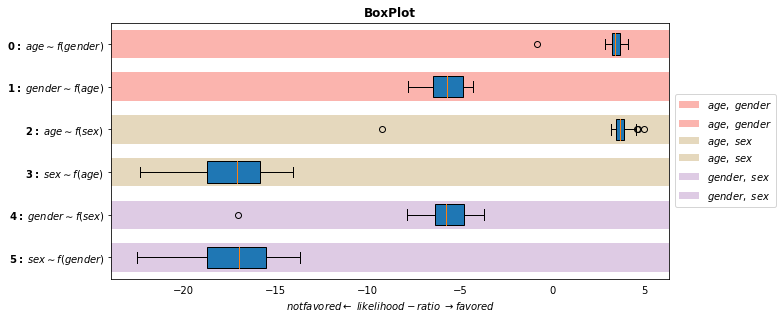

,Bivariate Comparison,Indep. Variable - Residuals [Median],Indep. Variable - Residuals [SD]
0,$age \sim f(gender)$,-4.221e-01,1.072e+00
1,$gender \sim f(age)$,7.646e-01,1.996e-01
2,$age \sim f(sex)$,-6.193e+00,2.929e+00
3,$sex \sim f(age)$,-4.843e+00,9.029e-01
4,$gender \sim f(sex)$,-9.169e+00,2.881e+00
5,$sex \sim f(gender)$,-3.152e+00,8.569e-01


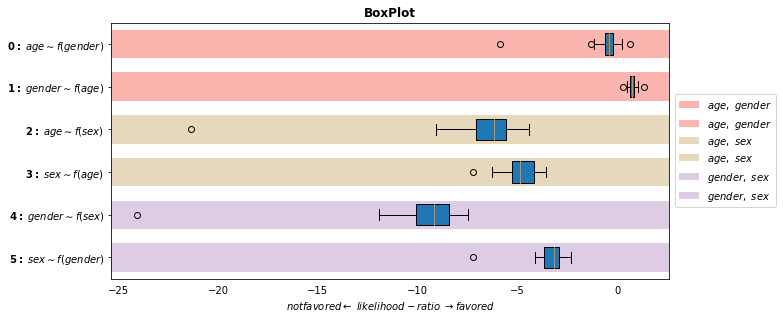

In [10]:
mymodel2.run(testtype='LikelihoodVariance', #LikelihoodVariance LikelihoodEntropy KolmogorovSmirnoff MannWhitney HSIC
            scale=True,
            bootstrap=30,
            holdout=True,
            plot_inference=False,
            plot_results=True,
#             bootstrap_ratio=1,
#             bootstrap_seed=5,
#             holdout_ratio=0.2,
#             holdout_seed=1,
#             modelpts=50,
#             gridsearch = True,
#             param_grid = {'C': [0.001, 0.01, 1, 10],
#                           'gamma': [0, 0.00001, 0.001, 0.1, 1],
#                           'coef0': [0],
#                           'tol': [0.001],
#                           'epsilon': [0.1]},
            )

In [11]:
mymodel2._results_df


,index,Fitted Combination,Bivariate Comparison,tdep,tindeps,tindep,Normality Indep. Variable SW_pvalue [List],Normality Indep. Variable SW_pvalue [Median],Normality Indep. Variable SW_pvalue [SD],Normality Indep. Variable Pearson_pvalue [List],...,Normality Residuals Pearson_pvalue [SD],Normality Residuals Combined_pvalue [List],Normality Residuals Combined_pvalue [Median],Normality Residuals Combined_pvalue [SD],Dependence: Indep. Variable - Residuals LikelihoodVariance [List],Dependence: Indep. Variable - Residuals LikelihoodVariance [Median],Dependence: Indep. Variable - Residuals LikelihoodVariance [SD],Dependence: Depen. Variable - Prediction (GoF) LikelihoodVariance [List],Dependence: Depen. Variable - Prediction (GoF) LikelihoodVariance [Median],Dependence: Depen. Variable - Prediction (GoF) LikelihoodVariance [SD]
0,0,"$age,\ gender$",$age \sim f(gender)$,0,[1],1,"[9.174220494401197e-09, 1.2581369446706958e-05...",1.967e-10,3.609e-06,"[1.1762364238483928e-11, 1.5393808856710522e-0...",...,3.483e-02,"[1.6974924616690583e-13, 2.3619619590414085e-1...",3.135e-10,2.202e-02,"[-0.20445179709545025, -0.339351161676392, 0.1...",-4.221e-01,1.072e+00,"[3.476556590613085, 3.3497824551055118, 3.7559...",3.384e+00,8.182e-01
1,0,"$age,\ gender$",$gender \sim f(age)$,1,[0],0,"[0.07172016054391861, 0.01349840871989727, 0.3...",4.341e-01,2.577e-01,"[0.11800737201767288, 0.0783157534591265, 0.31...",...,3.578e-01,"[0.6603203427891817, 7.214231446820654e-06, 0....",5.323e-01,4.068e-01,"[0.7078546436747026, 0.5637190899442118, 0.948...",7.646e-01,1.996e-01,"[-4.66246212348337, -4.724936389435406, -4.731...",-5.713e+00,9.601e-01
2,0,"$age,\ sex$",$age \sim f(sex)$,0,[2],2,"[3.649910878242777e-18, 1.3378791434164088e-16...",2.535e-18,1.203e-16,"[3.8340701022867694e-27, 1.7274560169036556e-2...",...,5.124e-03,"[7.291144160060468e-10, 8.370690512257363e-12,...",7.772e-09,1.264e-04,"[-5.5950002882231455, -5.2988864578505055, -5....",-6.193e+00,2.929e+00,"[3.672995465501089, 3.8718699774548564, 4.5392...",3.664e+00,2.373e+00
3,0,"$age,\ sex$",$sex \sim f(age)$,2,[0],0,"[0.07172016054391861, 0.01349840871989727, 0.3...",4.341e-01,2.577e-01,"[0.11800737201767288, 0.0783157534591265, 0.31...",...,1.692e-01,"[2.0286025994704707e-19, 2.886253174949047e-22...",6.547e-21,3.381e-02,"[-3.5485628259598596, -3.576036432467088, -4.9...",-4.843e+00,9.029e-01,"[-15.100053025352242, -14.915525488336936, -15...",-1.706e+01,2.241e+00
4,0,"$gender,\ sex$",$gender \sim f(sex)$,1,[2],2,"[3.649910878242777e-18, 1.3378791434164088e-16...",2.535e-18,1.203e-16,"[3.8340701022867694e-27, 1.7274560169036556e-2...",...,4.374e-02,"[4.673660758849156e-29, 8.886490044160222e-32,...",2.001e-13,4.159e-03,"[-8.329110943611834, -8.380616446956406, -8.39...",-9.169e+00,2.881e+00,"[-4.793824389443417, -4.696360115468054, -4.20...",-5.742e+00,2.306e+00
5,0,"$gender,\ sex$",$sex \sim f(gender)$,2,[1],1,"[9.174220494401197e-09, 1.2581369446706958e-05...",1.967e-10,3.609e-06,"[1.1762364238483928e-11, 1.5393808856710522e-0...",...,2.557e-01,"[0.0002262229567556294, 0.02945786377691666, 0...",1.023e-02,2.296e-01,"[-2.8718374330768004, -2.5672369398645767, -2....",-3.152e+00,8.569e-01,"[-15.388442583541142, -14.672650430538763, -15...",-1.697e+01,2.428e+00


In [12]:
set(["age","sex",'gender'])

{'age', 'gender', 'sex'}

# <a name="model"></a> Causal Model

## <a name="model-parameters"></a>Instance-Parameters
To run causal inference a model instance must be initialized with the following attributes:

**Observations**
* Test

**Observations Name (optional)**
* Test

**Regression Model**
* Test

**Scaler**
* Test

## <a name="model-methods"></a>Instance-Methods


## <a name="model-attributes"></a>Instance-Attributes



# <a name="template"></a>Templates
There are various models, scalers and observational datasets available to be loaded
## <a name="template-observations"></a>Observations
<b>whypy.load.observational</b>(<i>parameters</i>)
    This is a short explanation
    <br><br>
    <mark>parameters:</mark><br>
    <u>modelclass:</u> Defines the Number of variables (2V or 3V); Linear (Li) and non linear (NLi) models; Noise form (Gaussian Additive: GAM); the ground truth of causal structure (collider, reverse-collider, series, confounded, no relation)<br>
    Available Models: '3VNLiGAM-collider', '3VNLiGAM-rev-collider', '3VNLiGAM-series', '3VNLiGAM-confounded', '3VNLiGAM-none'<br>
    <u>no_observations:</u>  (Default: 100) <br>
    <u>seed:</u>  (Default:None)
    <br><br>
    <mark>returns:</mark><br>
    <u>observations:</u> Numpy Array (# observations, # variables)<br>
## <a name="template-regressionmodel"></a>Regression Model

## <a name="template-scaler"></a>Scaler



In [1]:
#Get a reference:
columns = ['age', 'gender', 'sex']
# obs = obs.to_numpy()

# seed=1
# rand_obs = np.array(sample(obs.flatten().tolist(), 500)).reshape(-1,1)
# obs = np.concatenate([obs, rand_obs], axis=1)

SyntaxError: invalid syntax (<ipython-input-1-91d2a0af24ed>, line 1)